In [76]:
import numpy as np
import umap
import matplotlib.pyplot as plt

In [86]:
embed_dim = np.load("../proc/chr19_embed_dims.npy")

In [87]:
embed_dim.shape

(10281, 512, 64)

In [79]:
seq1_cls = embed_dim[-2:-1, 0:1, :].flatten()

In [88]:
all_stack = np.zeros((64,64))
for x in range(embed_dim.shape[0]):
    curr_stack = embed_dim[x:x+1, 0:1, :].flatten()
    all_stack = np.vstack((all_stack, curr_stack))

# removing the 0 rows
all_stack = all_stack[~np.all(all_stack == 0, axis=1)]
all_stack.shape

(10281, 64)

In [89]:
umap_red = umap.UMAP()

In [90]:
umap_embed = umap_red.fit_transform(all_stack)
umap_embed.shape

(10281, 2)

In [92]:
umap_embed[0:10, :]

array([[ 3.5011594, -2.6128747],
       [-5.900514 , 13.227983 ],
       [ 1.7129055,  1.1131082],
       [ 7.38982  , 11.207451 ],
       [-5.7083597, 14.029825 ],
       [ 6.4376016, 11.001436 ],
       [ 4.635945 , -2.3564692],
       [ 4.4163475, -2.1584704],
       [ 2.1738431, -0.5434688],
       [ 1.8163786, 10.00079  ]], dtype=float32)

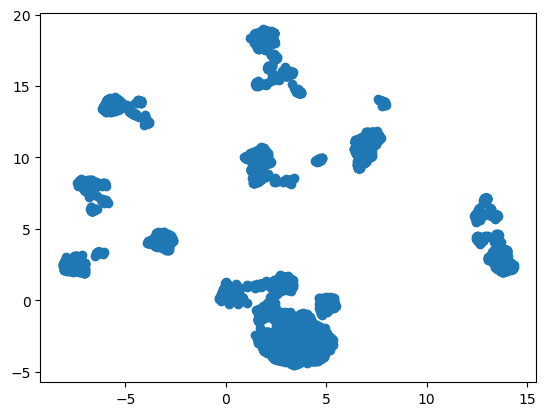

In [91]:
plt.scatter(umap_embed[:, 0], umap_embed[:, 1])